In [4]:
import networkx as nx
import matplotlib.pyplot as plt

In [274]:
G = nx.read_adjlist("./data/tiny_network.adjlist", create_using=nx.DiGraph, delimiter=";")

In [66]:
print(G.nodes())

['31806696', 'Luke Gilbert', '31486345', 'Michael Keiser', 'Marina Sirota', '29700475', 'Nevan Krogan', '33765435', '32025019', 'Atul Butte', 'Hani Goodarzi', '34272374', '32353859', '30944313', 'Neil Risch', '33483487', 'Martin Kampmann', '30727954', 'Michael McManus', 'Lani Wu', '32042149', '32036252', '33242416', '31395880', '32790644', 'Steven Altschuler', '31540829', '31626775', 'Charles Chiu', '33232663']


In [67]:
print(G.edges())

[('31806696', 'Luke Gilbert'), ('Luke Gilbert', '33483487'), ('Luke Gilbert', '31806696'), ('Luke Gilbert', '31626775'), ('Luke Gilbert', '31540829'), ('31486345', 'Michael Keiser'), ('31486345', 'Marina Sirota'), ('Michael Keiser', '33232663'), ('Marina Sirota', '31486345'), ('29700475', 'Michael Keiser'), ('29700475', 'Nevan Krogan'), ('Nevan Krogan', '34272374'), ('Nevan Krogan', '32353859'), ('Nevan Krogan', '30944313'), ('33765435', 'Marina Sirota'), ('32025019', 'Atul Butte'), ('32025019', 'Hani Goodarzi'), ('Atul Butte', '33765435'), ('Atul Butte', '33242416'), ('Atul Butte', '31395880'), ('Atul Butte', '30944313'), ('Hani Goodarzi', '33232663'), ('34272374', 'Martin Kampmann'), ('32353859', 'Atul Butte'), ('32353859', 'Martin Kampmann'), ('32353859', 'Nevan Krogan'), ('32353859', 'Marina Sirota'), ('30944313', 'Hani Goodarzi'), ('30944313', 'Nevan Krogan'), ('30944313', 'Marina Sirota'), ('Neil Risch', '29700475'), ('33483487', 'Luke Gilbert'), ('33483487', 'Martin Kampmann'), 

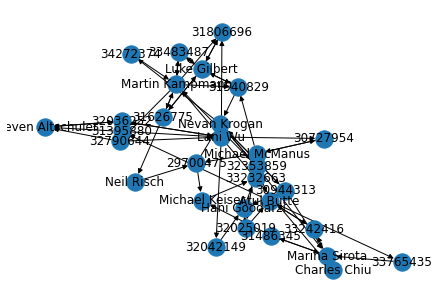

In [68]:
nx.draw(G, with_labels=True)
plt.show()

In [69]:
print(G.adj)

{'31806696': {'Luke Gilbert': {}}, 'Luke Gilbert': {'33483487': {}, '31806696': {}, '31626775': {}, '31540829': {}}, '31486345': {'Michael Keiser': {}, 'Marina Sirota': {}}, 'Michael Keiser': {'33232663': {}}, 'Marina Sirota': {'31486345': {}}, '29700475': {'Michael Keiser': {}, 'Nevan Krogan': {}}, 'Nevan Krogan': {'34272374': {}, '32353859': {}, '30944313': {}}, '33765435': {'Marina Sirota': {}}, '32025019': {'Atul Butte': {}, 'Hani Goodarzi': {}}, 'Atul Butte': {'33765435': {}, '33242416': {}, '31395880': {}, '30944313': {}}, 'Hani Goodarzi': {'33232663': {}}, '34272374': {'Martin Kampmann': {}}, '32353859': {'Atul Butte': {}, 'Martin Kampmann': {}, 'Nevan Krogan': {}, 'Marina Sirota': {}}, '30944313': {'Hani Goodarzi': {}, 'Nevan Krogan': {}, 'Marina Sirota': {}}, 'Neil Risch': {'29700475': {}}, '33483487': {'Luke Gilbert': {}, 'Martin Kampmann': {}}, 'Martin Kampmann': {'33483487': {}, '32790644': {}, '31806696': {}, '31626775': {}, '31540829': {}}, '30727954': {'Michael McManus':

In [70]:
list(G.neighbors('33483487'))

['Luke Gilbert', 'Martin Kampmann']

In [71]:
G.nodes

NodeView(('31806696', 'Luke Gilbert', '31486345', 'Michael Keiser', 'Marina Sirota', '29700475', 'Nevan Krogan', '33765435', '32025019', 'Atul Butte', 'Hani Goodarzi', '34272374', '32353859', '30944313', 'Neil Risch', '33483487', 'Martin Kampmann', '30727954', 'Michael McManus', 'Lani Wu', '32042149', '32036252', '33242416', '31395880', '32790644', 'Steven Altschuler', '31540829', '31626775', 'Charles Chiu', '33232663'))

In [72]:
print(G)

DiGraph with 30 nodes and 64 edges


In [73]:
list(G.neighbors('Martin Kampmann'))

['33483487', '32790644', '31806696', '31626775', '31540829']

In [74]:
list(G.neighbors('32790644'))

['Steven Altschuler', 'Lani Wu']

In [75]:
len(G.nodes)

30

In [5]:
from queue import Queue
    

In [6]:
queue = Queue()

In [277]:
queue.put('a')

In [79]:
print(queue.get())

a


In [80]:
print(queue)

In [192]:
def bfs(G, start, end=None):
    if start not in G:
        return None
    if end and end not in G:
        return None

    visited = {}
    q = Queue()
    q.put(start)
    visited[start] = None
    path = []

    while not q.empty():
        v = q.get()
        path.append(v)
        if v == end:
            return path

        neighbors = G.neighbors(v)
        for n in neighbors:
            if n not in visited:
                visited.append(n)
                q.put(n)

    if end:
        return None
    else:
        return path

In [9]:
G_test = nx.DiGraph()
G_test.add_edge('A', 'B')
G_test.add_edge('A', 'C')
G_test.add_edge('B', 'D')
G_test.add_edge('B', 'E')

In [10]:
len(G_test)

5

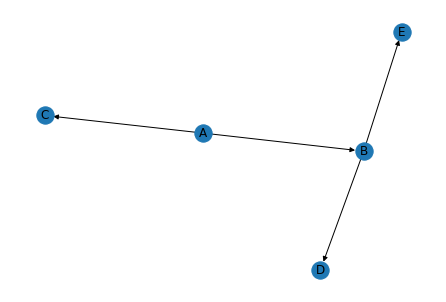

In [195]:
nx.draw(G_test, with_labels=True)
plt.show()

In [196]:
print(bfs(G_test, 'A'))
print(bfs(G_test, 'A', 'E')) 
print(bfs(G_test, 'C')) 
print(bfs(G_test, 'A', 'C')) 

['A', 'B', 'C', 'D', 'E']
['A', 'B', 'C', 'D', 'E']
['C']
['A', 'B', 'C']


In [88]:
G_test.remove_node('B')
print(bfs(G, 'A')) # None

None


In [320]:
print(bfs2(G, 'Lani Wu', 'Atul Butte'))

['Lani Wu', '30727954', 'Michael McManus', '32025019', 'Atul Butte']


In [12]:
def bfs2(G, start, end=None):
    if start not in G:
        return None
    if end and end not in G:
        return None

    visited = {}
    q = Queue()
    path = []
    
    q.put(start)
    visited[start] = None

    while not q.empty():
        curr_node = q.get()
        path.append(curr_node)
        
        if curr_node == end:
            path = [curr_node]
            
            while curr_node != start:
                curr_node = visited[curr_node]
                path.append(curr_node)
            return path[::-1]

        neighbors = G.neighbors(curr_node)
        for n in neighbors:
            if n not in visited:
                visited[n] = curr_node
                q.put(n)

    if end:
        return None
    else:
        return path

In [306]:
print(bfs(G_test, 'A', 'A'))
print(bfs(G_test, 'A', 'E')) 
print(bfs(G_test, 'C')) 
print(bfs(G_test, 'A', 'C')) 

['A']
['A', 'B', 'C', 'D', 'E']
['C']
['A', 'B', 'C']


In [13]:
print(bfs2(G_test, 'A', 'A'))
print(bfs2(G_test, 'A', 'E')) 
print(bfs2(G_test, 'C')) 
print(bfs2(G_test, 'A', 'C')) 

['A']
['A', 'B', 'E']
['C']
['A', 'C']


In [271]:
print(bfs2(G,'Marina Sirota', 'Michael Keiser'))

None


In [310]:
test = nx.DiGraph()
test.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

# find shortest path
print(bfs2(test, 1))  # [1, 2, 3, 4]
print(bfs2(test, 1, 4))  # [1, 2, 4]
print(bfs2(test, 1, 5))  # None

[1, 2, 3, 4]
[1, 2, 4]
None


In [1]:
from search import graph

In [2]:
g = graph.Graph("./data/tiny_network.adjlist")

In [3]:
traversal = g.bfs("Michael Keiser")

In [313]:
len(traversal)

30

In [314]:
print(traversal)

['Michael Keiser', '33232663', 'Charles Chiu', 'Martin Kampmann', '33242416', '33483487', '32790644', '31806696', '31626775', '31540829', 'Atul Butte', 'Luke Gilbert', 'Steven Altschuler', 'Lani Wu', 'Neil Risch', 'Nevan Krogan', '33765435', '31395880', '30944313', '32036252', '32042149', '30727954', '29700475', '34272374', '32353859', 'Marina Sirota', 'Hani Goodarzi', 'Michael McManus', '31486345', '32025019']


In [4]:
g2 = graph.Graph("./data/citation_network.adjlist")

In [5]:
shortpath = g2.bfs('Lani Wu', 'Atul Butte')

In [5]:
len(shortpath)

5

In [6]:
print(shortpath)

['Lani Wu', '30727954', 'Michael McManus', '32025019', 'Atul Butte']


In [13]:
nopath = g2.bfs('Lani Wu', 'Neil Rish')

In [14]:
print(nopath)

None


In [9]:
missingstart = g2.bfs('Jennifer Coolidge')
print(missingstart)

None


In [17]:
empty = nx.DiGraph()

In [20]:
emptypath = bfs2(empty, 0)

In [21]:
print(emptypath)

None


In [22]:
with pytest.raises(Exception):
    nopath = g.bfs('Lani Wu', 'Neil Rish')
assert "These nodes are not connected"

NameError: name 'pytest' is not defined